In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [2]:
columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

In [3]:
data=pd.read_csv("heart _5_.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.shape

(303, 14)

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
data.nunique()# how many unique values

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
data['slope'].unique()# display unique values

array([0, 2, 1])

In [10]:
data['slope'].value_counts()# display count of each unique values

slope
2    142
1    140
0     21
Name: count, dtype: int64

In [11]:
data['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77])

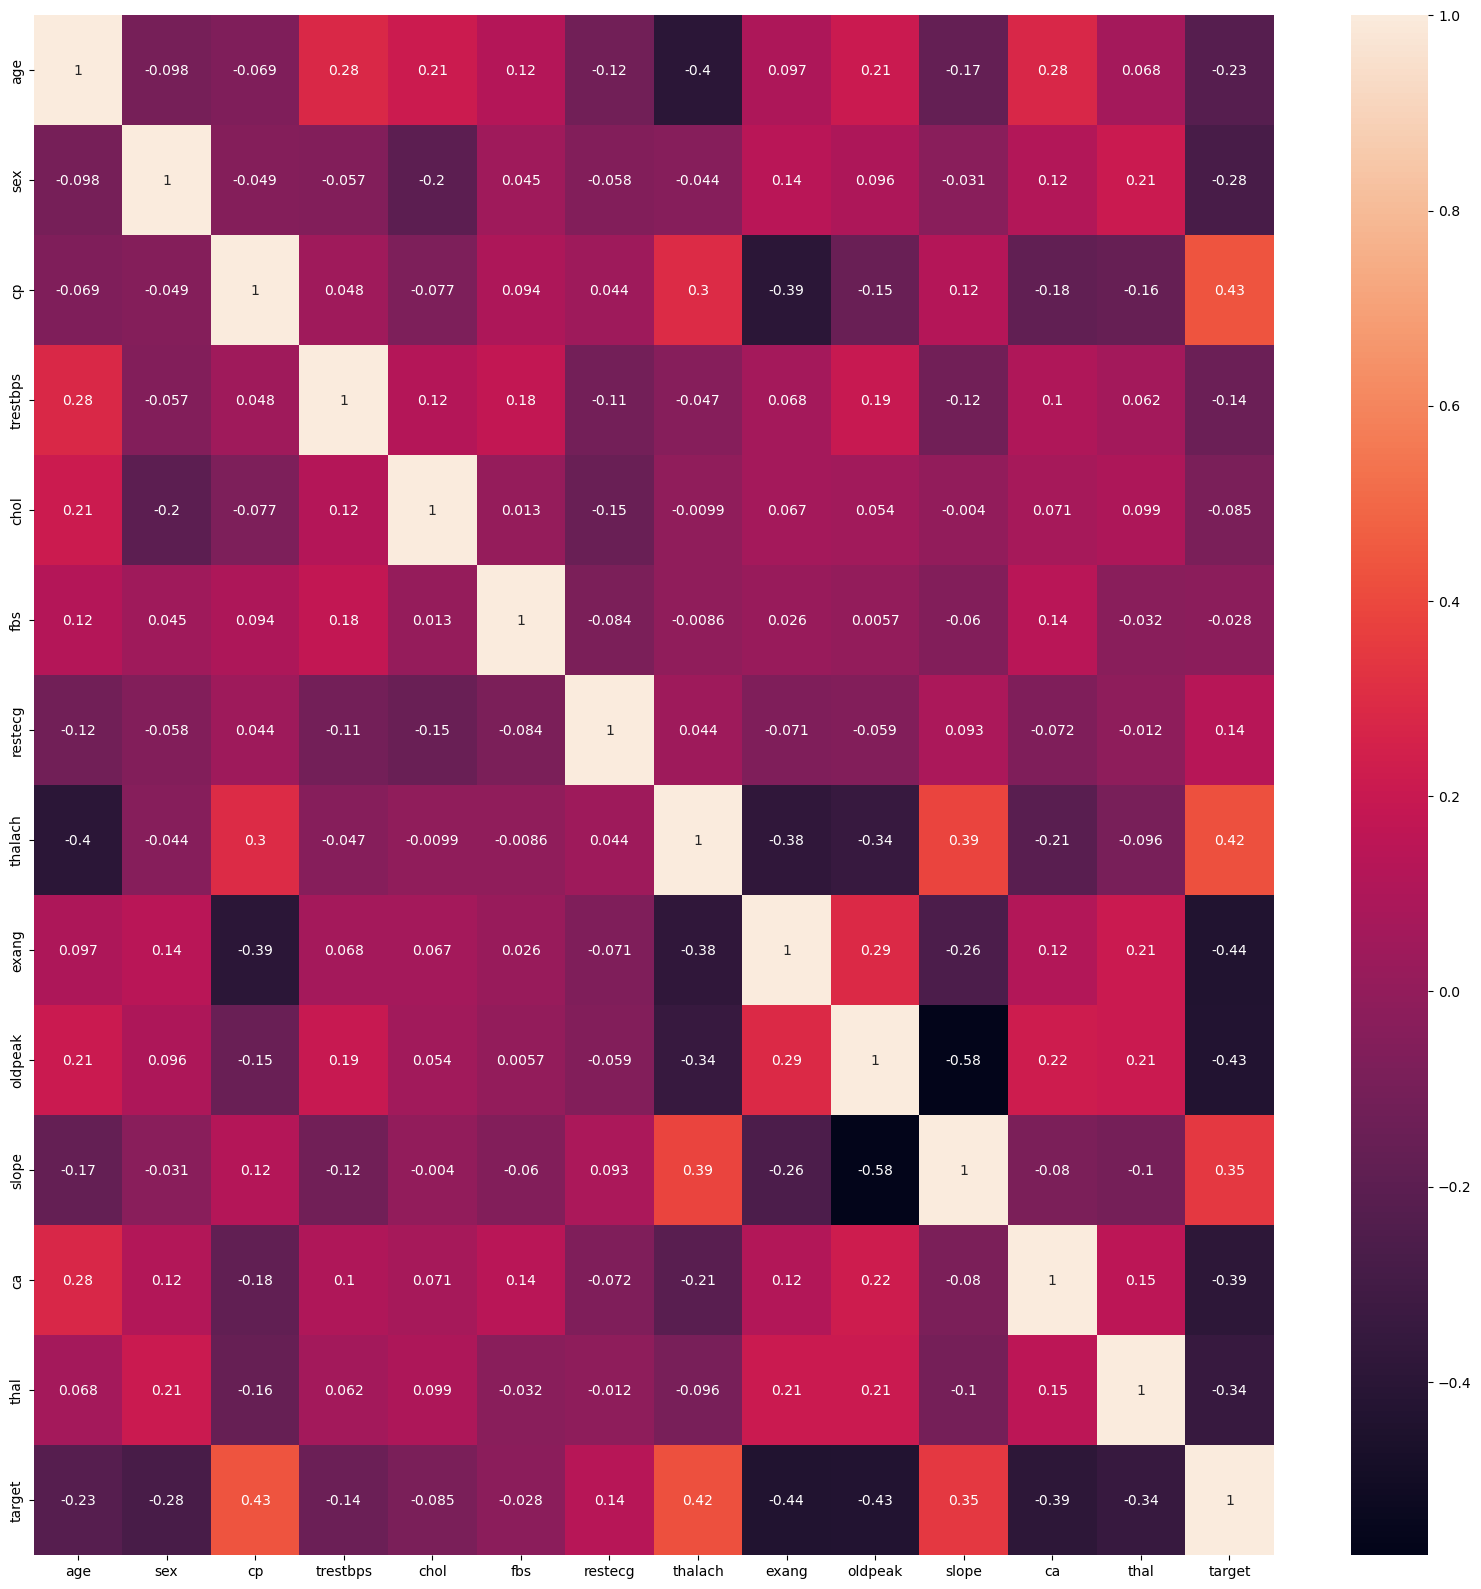

In [12]:
cor=data.corr()# np.corrcoef(data.T),np.corrcoef(data,rowvar=flase)
plt.figure(figsize=(20,20))
sns.heatmap(cor,annot=True)
plt.show()

# Data Visuqlization

In [13]:
# a. Visualize the number of patients having a heart disease and not having
#a heart disease
#b. Visualize the age and whether a patient has disease or not
#c. Visualize correlation between all features using a heat map


In [14]:
print(data['age'].groupby(data['target']).sum())

target
0    7811
1    8662
Name: age, dtype: int64


In [15]:
bar=data['target'].value_counts()

In [16]:
y=(bar.values)

In [17]:
x=(bar.index)

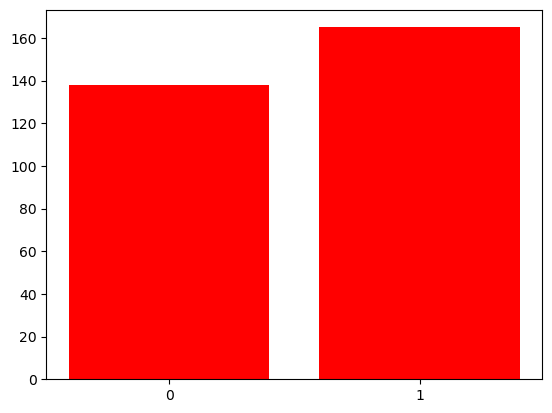

In [18]:
plt.bar(x,y,color='red')
plt.xticks([0,1])
plt.show()

In [19]:
bar1=data['age'].groupby(data['target']).count()
y=(bar1.values)
x=(bar1.index)

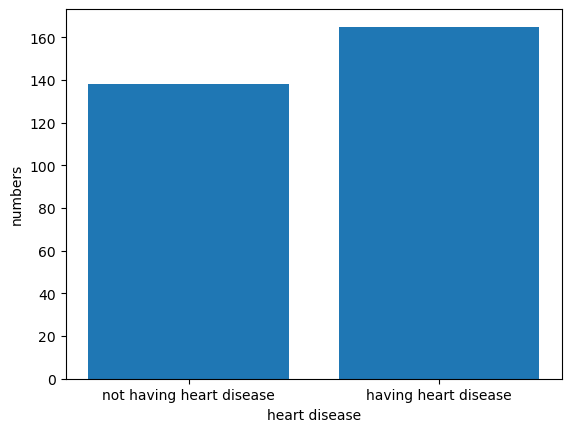

In [20]:
plt.bar(x,y)
plt.xticks([0,1],['not having heart disease','having heart disease'])
plt.xlabel('heart disease')
plt.ylabel('numbers')
plt.show()

In [21]:
def vif_call(independent):
    #print(independent.head(1))
    loop=True
    while loop:
        vif=pd.DataFrame()
        vif['columns']=independent.columns
        vif['vif']=[VIF(independent.values,i) for i in range(len(independent.columns))]
        column_todrop=vif.sort_values(by='vif',ascending=False).head(1)
        column_todrop=column_todrop[column_todrop['vif']>6]['columns']
        #print("Column to drop",column_todrop)
        if column_todrop.empty:
            #loop=False
            print(vif)
            return(independent)
        else:
            independent=independent.drop(column_todrop,axis=1)

In [22]:
independent=data.drop('target',axis=1)
independent_columns=vif_call(independent)

   columns       vif
0      sex  3.038525
1       cp  2.112149
2      fbs  1.222870
3  restecg  1.957971
4    exang  1.795800
5  oldpeak  2.062440
6    slope  3.756703
7       ca  1.686170


In [23]:
print(independent_columns)

     sex  cp  fbs  restecg  exang  oldpeak  slope  ca
0      1   3    1        0      0      2.3      0   0
1      1   2    0        1      0      3.5      0   0
2      0   1    0        0      0      1.4      2   0
3      1   1    0        1      0      0.8      2   0
4      0   0    0        1      1      0.6      2   0
..   ...  ..  ...      ...    ...      ...    ...  ..
298    0   0    0        1      1      0.2      1   0
299    1   3    0        1      0      1.2      1   0
300    1   0    1        1      0      3.4      1   2
301    1   0    0        1      1      1.2      1   1
302    0   1    0        0      0      0.0      1   1

[303 rows x 8 columns]


# 3. Logistic Regression:
i. Divide the dataset in 70:30 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and get the accuracy score



In [24]:
def log_model():
    X=independent_columns
    y=data['target']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
    model=LogisticRegression()
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    #print(y_predict)
    print("Accuracy_SCore",accuracy_score(y_predict,y_test))
    print("Confusion_Matric\n",confusion_matrix(y_test,y_predict))
    print("Clasificatiiopn_report",classification_report(y_test,y_predict))
    sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
    return accuracy_score(y_predict,y_test)
    plt.show()


Accuracy_SCore 0.8131868131868132
Confusion_Matric
 [[34  7]
 [10 40]]
Clasificatiiopn_report               precision    recall  f1-score   support

           0       0.77      0.83      0.80        41
           1       0.85      0.80      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



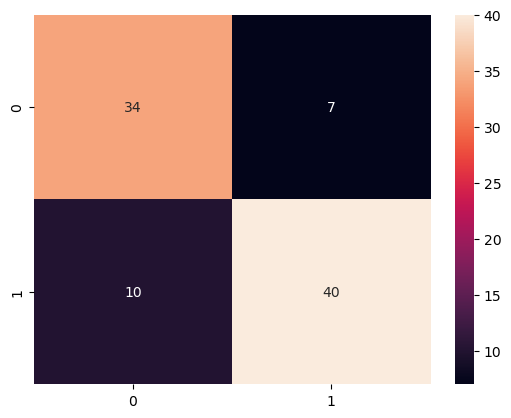

In [25]:
log_accuracy=log_model()


# 4. Decision Tree:


Accuracy_SCore 0.7802197802197802
Confusion_Matric
 [[34  7]
 [13 37]]
Clasificatiiopn_report               precision    recall  f1-score   support

           0       0.72      0.83      0.77        41
           1       0.84      0.74      0.79        50

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



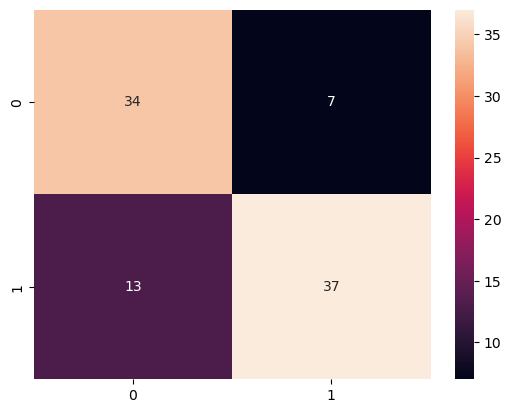

In [26]:
#def model_decision():
X=independent_columns
y=data['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)   
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)
print("Accuracy_SCore",accuracy_score(y_predict,y_test))
print("Confusion_Matric\n",confusion_matrix(y_test,y_predict))
print("Clasificatiiopn_report",classification_report(y_test,y_predict))
tree_score=accuracy_score(y_predict,y_test)
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
plt.show()
    

# RandomForest

In [28]:
def model_randomforest():
    X=independent_columns
    y=data['target']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)   
    classifier=RandomForestClassifier()
    classifier.fit(X_train,y_train)
    y_predict=classifier.predict(X_test)
    print("Accuracy_SCore",accuracy_score(y_predict,y_test))
    print("Confusion_Matric\n",confusion_matrix(y_test,y_predict))
    print("Clasificatiiopn_report",classification_report(y_test,y_predict))
    sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)
    return accuracy_score(y_predict,y_test)
    plt.show()
        

Accuracy_SCore 0.8241758241758241
Confusion_Matric
 [[36  5]
 [11 39]]
Clasificatiiopn_report               precision    recall  f1-score   support

           0       0.77      0.88      0.82        41
           1       0.89      0.78      0.83        50

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



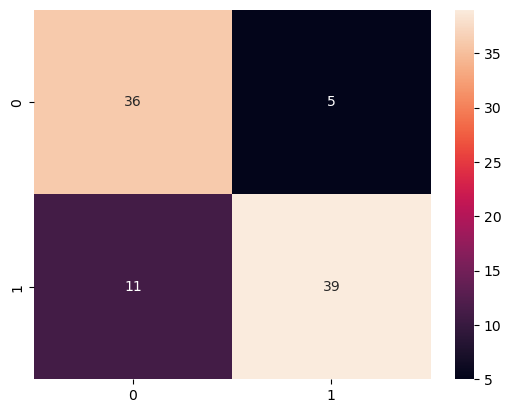

In [29]:
forest_score=model_randomforest()

In [30]:
if ((log_accuracy>forest_score) & (log_accuracy>tree_score)):
    print("Logistic regression is best model")
elif ((forest_score >log_accuracy) & (forest_score>tree_score)):
    print("Random Forest is best model")
else:
    print("DecisionTree is best")

Random Forest is best model


In [31]:
print(log_accuracy)

0.8131868131868132


In [32]:
print(tree_score)

0.7802197802197802


In [33]:
print(forest_score)

0.8241758241758241
